In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [95]:
df1 = pd.read_csv("Training.csv")
df2 = pd.read_csv("Testing.csv")

In [96]:
df2.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

Saving the columns in a text file

In [112]:
# Convert dataframe/pandas to numpy array
symptoms = np.array(df2.columns)

# Save array to a text file
with open('array.txt', 'w') as f:
    for row in symptoms:
        f.write(''.join(map(str, row)) + '\n')

In [73]:
df1.drop(columns=['Unnamed: 133'], inplace=True)

In [74]:
df2.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Check null values in both the datasets

In [75]:
df1.isnull().sum().sum()
df2.isnull().sum().sum()

0

## Independent & Dependent Variables

In [76]:
X_train = df1.iloc[:,:-1].values
y_train = df1.iloc[:,-1].values
x_test = df2.iloc[:,:-1].values
y_test = df2.iloc[:,-1].values

X_train

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]], dtype=int64)

In [97]:
y_test

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [77]:
from sklearn.preprocessing import LabelEncoder
import pickle

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# Save the LabelEn  coder to a file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
classifier = RandomForestClassifier(n_estimators=1000)

In [80]:
X_train.shape

(4920, 132)

## Training our model

In [81]:
classifier.fit(X_train,y_train)



RandomForestClassifier(n_estimators=1000)

In [113]:
# Testing our model for first row0
randomforestprediction = classifier.predict(x_test)
randomforestprediction
original_labels = le.inverse_transform(randomforestprediction)
original_labels

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Chicken pox'],
      dtype=object)

In [106]:
# from sklearn.metrics import accuracy_score
# score = accuracy_score(y_test.reshape(-1, 1), randomforestprediction)


ValueError: Found input variables with inconsistent numbers of samples: [42, 1]

In [84]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(n_neighbors=5)

In [85]:
classifier2.fit(X_train,y_train)

KNeighborsClassifier()

In [107]:
knnprediction = classifier.predict(x_test)
score2 = accuracy_score(y_test,knnprediction)

In [108]:
score2

0.9761904761904762

In [109]:
score

0.9761904761904762

In [89]:
import xgboost as xgb

In [90]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
xgb_predictedvalue = xgb_model.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score

score3 = accuracy_score(y_test, xgb_predictedvalue)

In [92]:
score3

0.9761904761904762

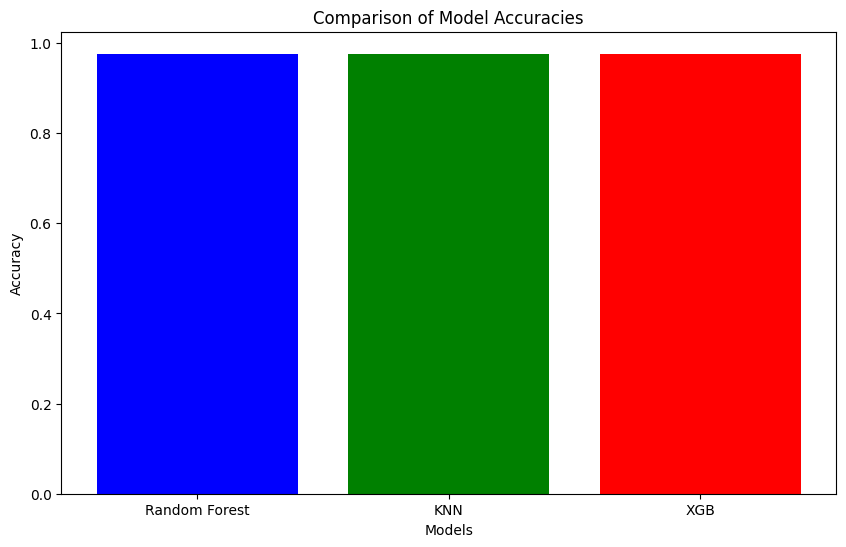

In [111]:

models = ['Random Forest', 'KNN', 'XGB']

# Accuracy scores for each model
accuracies = [score, score2, score3]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()


In [94]:
joblib.dump(classifier2, 'model.joblib')

['model.joblib']